In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/flightPrice.csv')
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [3]:
data.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [5]:
data.shape

(452088, 13)

In [6]:
# Convert 'Date_of_journey' to datetime
data['Date_of_journey'] = pd.to_datetime(data['Date_of_journey'])

# Extract day of the week and month from 'Date_of_journey'
data['Weekday'] = data['Date_of_journey'].dt.day_name()
data['Month'] = data['Date_of_journey'].dt.month
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Weekday,Month
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,Monday,1
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,Monday,1
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,Monday,1
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,Monday,1
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,Monday,1


In [7]:
encoder = LabelEncoder()
categorical_columns = ['Airline', 'Class', 'Source', 'Destination', 'Departure', 'Arrival']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Weekday,Month
0,2023-01-16,Monday,6,SG-8169,1,3,2,non-stop,2,6,2.0833,1,5335,Monday,1
1,2023-01-16,Monday,5,6E-2519,1,3,2,non-stop,3,6,2.3333,1,5899,Monday,1
2,2023-01-16,Monday,4,G8-354,1,3,2,non-stop,3,6,2.1667,1,5801,Monday,1
3,2023-01-16,Monday,6,SG-8709,1,3,2,non-stop,2,6,2.0833,1,5794,Monday,1
4,2023-01-16,Monday,0,AI-805,1,3,2,non-stop,2,6,2.1667,1,5955,Monday,1


In [8]:
print(data['Total_stops'].unique())

['non-stop' '1-stop' '2+-stop']


In [9]:
data['Total_stops'] = data['Total_stops'].map({'non-stop': 0, '1-stop': 1, '2+-stop': 2})
data['Weekday'] = data['Weekday'].map({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
})
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Weekday,Month
0,2023-01-16,Monday,6,SG-8169,1,3,2,0,2,6,2.0833,1,5335,1,1
1,2023-01-16,Monday,5,6E-2519,1,3,2,0,3,6,2.3333,1,5899,1,1
2,2023-01-16,Monday,4,G8-354,1,3,2,0,3,6,2.1667,1,5801,1,1
3,2023-01-16,Monday,6,SG-8709,1,3,2,0,2,6,2.0833,1,5794,1,1
4,2023-01-16,Monday,0,AI-805,1,3,2,0,2,6,2.1667,1,5955,1,1


In [10]:
data.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
Weekday              0
Month                0
dtype: int64

In [11]:
data.dtypes

Date_of_journey      datetime64[ns]
Journey_day                  object
Airline                       int32
Flight_code                  object
Class                         int32
Source                        int32
Departure                     int32
Total_stops                   int64
Arrival                       int32
Destination                   int32
Duration_in_hours           float64
Days_left                     int64
Fare                          int64
Weekday                       int64
Month                         int32
dtype: object

In [12]:
X = data.drop(columns=['Fare', 'Flight_code', 'Journey_day', 'Date_of_journey'])
y = data['Fare']

In [13]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Training set shape:', X_train.shape)
print('Validation set shape:', X_val.shape)
print('Test set shape:', X_test.shape)

Training set shape: (316461, 11)
Validation set shape: (67813, 11)
Test set shape: (67814, 11)


In [14]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Validate the model
y_val_pred_rf = rf_model.predict(X_val)
val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)

print('Validation MSE (Random Forest):', val_mse_rf)
print('Validation R2 (Random Forest):', val_r2_rf)


Validation MSE (Random Forest): 19783856.434670188
Validation R2 (Random Forest): 0.952203625685188


In [16]:
# Test the model
y_test_pred_rf = rf_model.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print('Test MSE (Random Forest):', test_mse_rf)
print('Test R2 (Random Forest):', test_r2_rf)

Test MSE (Random Forest): 19063070.90363536
Test R2 (Random Forest): 0.953563484925603


In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
# Train the Random Forest Regressor with pre-pruning
rf_pruned = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_pruned.fit(X_train, y_train)

# Predict on the test set
y_pred_pruned = rf_pruned.predict(X_test)

# Evaluate the pruned model
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)

print('Mean Squared Error (Pruned):', mse_pruned)
print('R^2 Value (Pruned):', r2_pruned)

Mean Squared Error (Pruned): 35257473.17258868
R^2 Value (Pruned): 0.9141148772545438


# feature importance analysis 

In [19]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

              Feature  Importance
1               Class    0.798980
7   Duration_in_hours    0.084079
8           Days_left    0.034600
2              Source    0.019406
6         Destination    0.018934
0             Airline    0.015238
9             Weekday    0.009342
3           Departure    0.008017
5             Arrival    0.007715
4         Total_stops    0.003006
10              Month    0.000682


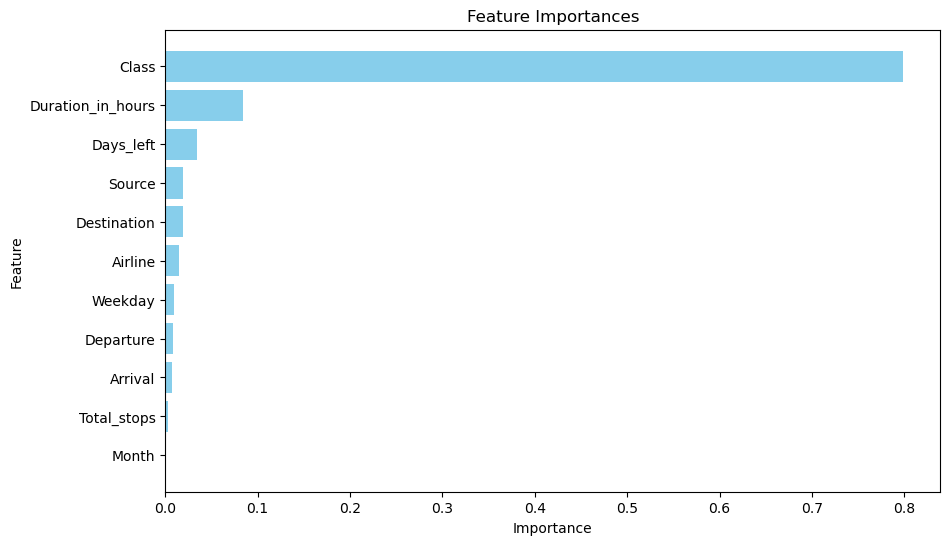

In [20]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [21]:
# Select the top features based on feature importance
# Let's select the top 5 features for this example
num_top_features = 5
top_features = feature_importances_df['Feature'].head(num_top_features).tolist()

# Create a new dataset with only the top features
X_top_features = X[top_features]

# Split the data into training and testing sets
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

print('Top features selected:', top_features)
print('Shape of new feature set:', X_top_features.shape)

Top features selected: ['Class', 'Duration_in_hours', 'Days_left', 'Source', 'Destination']
Shape of new feature set: (452088, 5)


In [23]:
# Import necessary libraries for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Train a new Decision Tree Regressor using the selected features
model_top_features = RandomForestRegressor(n_estimators=100, random_state=42)
model_top_features.fit(X_train_top, y_train_top)

# Make predictions
y_pred_top = model_top_features.predict(X_test_top)

# Evaluate the model
mse_top = mean_squared_error(y_test_top, y_pred_top)
r2_top = r2_score(y_test_top, y_pred_top)

print('Mean Squared Error (Top Features):', mse_top)
print('R^2 Score (Top Features):', r2_top)

Mean Squared Error (Top Features): 36720996.34240422
R^2 Score (Top Features): 0.9110154351467266


In [24]:
# Train a new Decision Tree Regressor using the selected features
rf_model.fit(X_train_top, y_train_top)

# Make predictions
y_pred_top = rf_model.predict(X_test_top)

# Evaluate the model
mse_top = mean_squared_error(y_test_top, y_pred_top)
r2_top = r2_score(y_test_top, y_pred_top)

print('Mean Squared Error (Top Features):', mse_top)
print('R^2 Score (Top Features):', r2_top)

Mean Squared Error (Top Features): 36720996.34240422
R^2 Score (Top Features): 0.9110154351467266
